In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
import datetime
import seaborn as sns

%matplotlib inline
os.chdir('/Users/flatironschooldc3/FlatironSchoolRepo/dc-ds-111819/module-1/project/unzipped_data')
#os.chdir('/Users/flatironschooldc/Code/LearnCo/dc-ds-111819/module-1/project/data/')



# ''' Our to do list .   '''
# '''
# 1) Get a nice plot for time trends

# 2) Run regression with ROI

# 3) Clean up Genre + Make Dummies

# 4) Segmenting anaylsis by moive budget, time, studio, maybe other categories


# '''

In [11]:
films = pd.read_csv('films.csv')
films2 = pd.read_csv('imdbom.csv')

films_yr = films.groupby('year').agg(['mean'])

In [12]:
films_yr.columns = [x for (x,y) in films_yr.columns]
films_yr.reset_index(inplace=True)

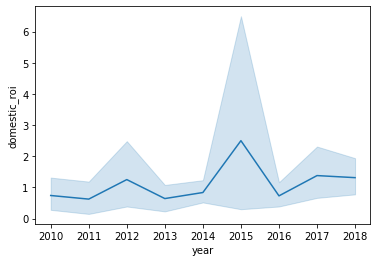

In [13]:
films_yr['sub'] = 0 #add a null column that seaborn needs
#see https://stackoverflow.com/questions/42955079/seaborn-tsplot-not-showing-data

# Using lineplot instead of tsplot (based on notice for deprecated function)
sns.lineplot(data=films, x='year',y='domestic_roi')

# sns.tsplot(films_yr, time='year',value='domestic_roi',unit='sub')
# sns.tsplot(films_yr, time='year',value='worldwide_roi',unit='sub')
# sns.tsplot(films_yr, time='year',value='production_budget',unit='sub')
# sns.tsplot(films_yr, time='year',value='popularity',unit='sub')
# sns.tsplot(films_yr, time='year',value='averagerating',unit='sub')

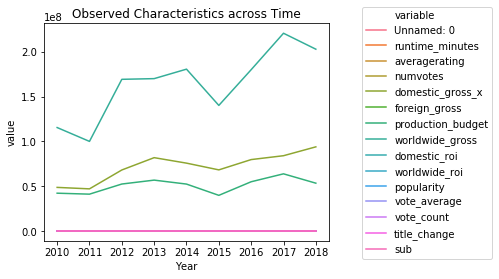

In [23]:
# How everything look together?
fig = sns.lineplot(data=pd.melt(films_yr, ['year']), x='year',y='value', hue='variable', legend='brief')
box = fig.get_position()

fig.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
# Put a legend to the right side
fig.legend(loc=0, bbox_to_anchor=(1.1, 1.1))
plt.title("Observed Characteristics across Time")
plt.xlabel("Year")
plt.show()

In [89]:
# Plot relevant subsets of data together on one plot by first subetting df
sns.set_context("talk")
# ax.set(xlabel='Xlabel', ylabel='Ylabel', title='Title', xlim=(xmin, xmax), ylim=(ymin, ymax))

def lineplot_melt(df, columns):
    df1=df.filter(items=['year', *columns])
    ax = sns.lineplot(data=pd.melt(df1, ['year']), x='year',y='value', hue='variable', legend='full')
    return ax



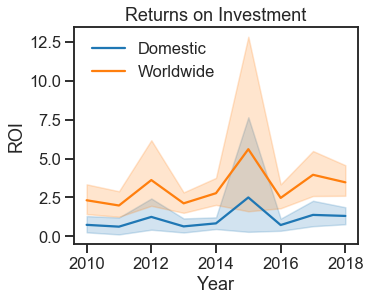

In [97]:
# Test function with multiple arguments
# lineplot_melt(films, ['domestic_roi', 'worldwide_roi'])
# works, but does not allow for graph customization

films_roi=films.filter(items=['year', 'domestic_roi', 'worldwide_roi'])
ax1 = sns.lineplot(data=pd.melt(films_roi, ['year']), x='year',y='value', hue='variable', legend='full')

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
mylabels = ['Domestic','Worldwide']
ax1.legend(loc=0, bbox_to_anchor=(0.55, 1), labels = mylabels, frameon=False)
ax1.set(xlabel='Year', ylabel='ROI', title="Returns on Investment")

plt.show()

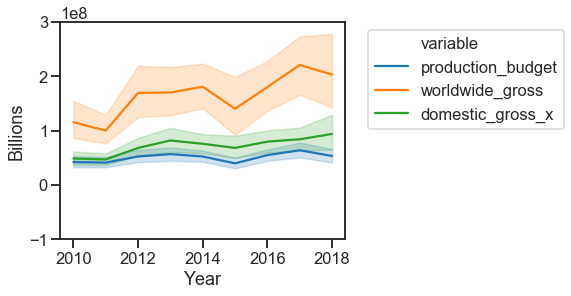

In [91]:
# lineplot_melt(films, ['production_budget','worldwide_gross', 'domestic_gross_x'])

films_bd=films.filter(items=['year','production_budget','worldwide_gross', 'domestic_gross_x'])
ax = sns.lineplot(data=pd.melt(films_bd, ['year']), x='year',y='value', hue='variable', legend='full')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
# Put a legend to the right side
ax.legend(loc=0, bbox_to_anchor=(1.8, 1))
ax.set(xlabel='Year', ylabel='Billions', ylim=(-1e8, 3e8))
plt.show()

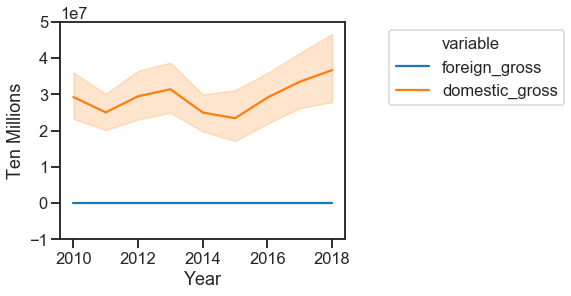

In [77]:
# lineplot_melt(films2, ['foreign_gross', 'domestic_gross'])

films2_bd=films2.filter(items=['year','foreign_gross', 'domestic_gross'])
ax2 = sns.lineplot(data=pd.melt(films2_bd, ['year']), x='year',y='value', hue='variable', legend='full')

box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
# Put a legend to the right side
ax2.legend(loc=0, bbox_to_anchor=(1.8, 1))
ax2.set(xlabel='Year', ylabel='Ten Millions', ylim=(-1e7, 5e7))
plt.show()


count    967.000000
mean       0.797100
std        2.573567
min       -1.000000
25%       -0.520986
50%        0.038275
75%        1.078856
max       21.796861
Name: domestic_roi, dtype: float64

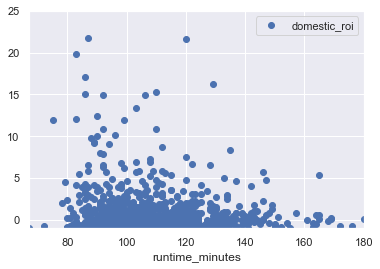

In [77]:
films_test = films[films['domestic_roi']<30] #clip some outliers
films_test.plot(x='runtime_minutes',y='domestic_roi',style='o',ylim=(-1,25)) 
films_test.domestic_roi.describe()

In [78]:
import statsmodels.api as sm # import statsmodels 


def regression(df,y,x):
        X = df[x] ## X usually means our input variables (or independent variables)
        Y = df[y] ## Y usually means our output/dependent variable
        X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

        # Note the difference in argument order for oridinary least squares (OLS)
        model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
        predictions = model.predict(X)

        # Print out the statistics
        print(model.summary())

In [79]:
regression(films,'domestic_roi','year')

                            OLS Regression Results                            
Dep. Variable:           domestic_roi   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7792
Date:                Tue, 03 Dec 2019   Prob (F-statistic):              0.378
Time:                        13:55:48   Log-Likelihood:                -3385.1
No. Observations:                 970   AIC:                             6774.
Df Residuals:                     968   BIC:                             6784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -179.1944    204.271     -0.877      0.3